In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as ns
import sklearn as skl
from sklearn.datasets import fetch_california_housing 

In [4]:
import pandas as pd
data = fetch_california_housing()

In [5]:
df = pd.DataFrame(data.data,columns = data.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
dtype: float64

In [10]:
 df.shape

(20640, 8)

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [12]:
df.Population.kurtosis()

73.55311639416514

<Axes: xlabel='Population'>

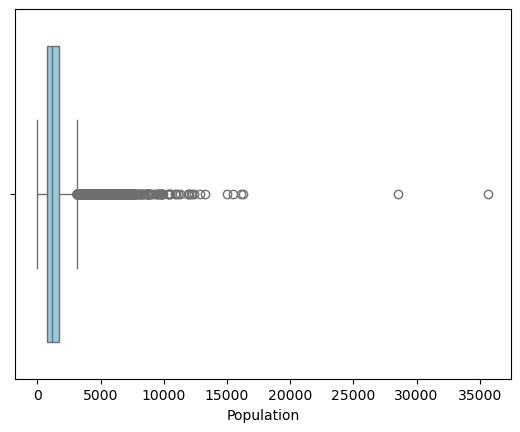

In [13]:
sns.boxplot(x= df.Population, color = 'skyblue')

In [14]:
df['Population']=ns.sqrt(df['Population'])

In [15]:
df['Population'].skew()

1.2246549321367803

In [16]:
upper_limit = df['Population'].mean()+3*df['Population'].std()
lower_limit = df['Population'].mean()-3*df['Population'].std()
upper_limit,lower_limit

(72.85635401851769, -1.5325881666725891)

In [17]:
new_df = df.loc[(df['Population']<upper_limit)&(df['Population']>lower_limit)]

In [18]:
len(df)

20640

In [19]:
len(new_df)

20382

In [20]:
print('outliers:',len(df)-len(new_df))

outliers: 258


<Axes: xlabel='Population'>

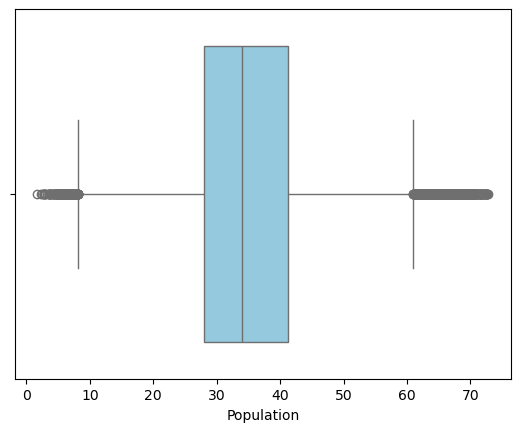

In [21]:
sns.boxplot(x=new_df.Population, color = 'skyblue')

In [22]:
q1 = df.Population.quantile(0.53)
q2 = df.Population.quantile(0.65)
iqr = q2-q1
q1,q2,iqr

(34.899856733230294, 38.2099463490856, 3.310089615855304)

In [23]:
upper_limit = q2+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
upper_limit,lower_limit

(43.175080772868554, 29.934722309447338)

In [24]:
df.loc[(df['Population']>upper_limit)|(df['Population']<lower_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,17.944358,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,49.000000,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,22.271057,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,23.622024,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,23.769729,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20627,3.0000,5.0,6.067797,1.101695,13.000000,2.864407,39.13,-121.32
20629,2.0943,28.0,5.519802,1.020902,83.138439,3.801980,39.12,-121.39
20635,1.5603,25.0,5.045455,1.133333,29.068884,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,18.867962,3.122807,39.49,-121.21


In [25]:
new_df = df.loc[(df['Population']<upper_limit)&(df['Population']>lower_limit)]

In [26]:
len(new_df)

9564

In [27]:
print('outliers:',len(df)-len(new_df))

outliers: 11076


<Axes: xlabel='Population'>

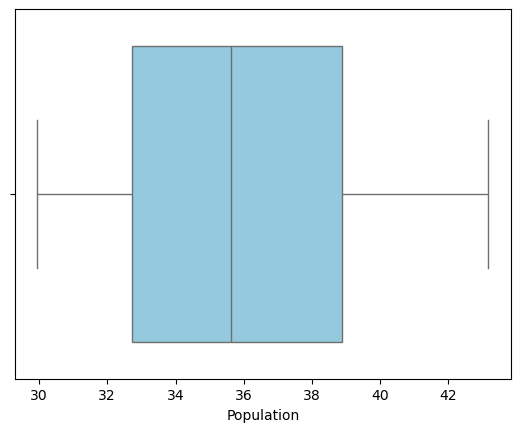

In [28]:
sns.boxplot(x=new_df.Population, color = 'skyblue')

In [29]:
#selected Population and House age

<Axes: xlabel='HouseAge'>

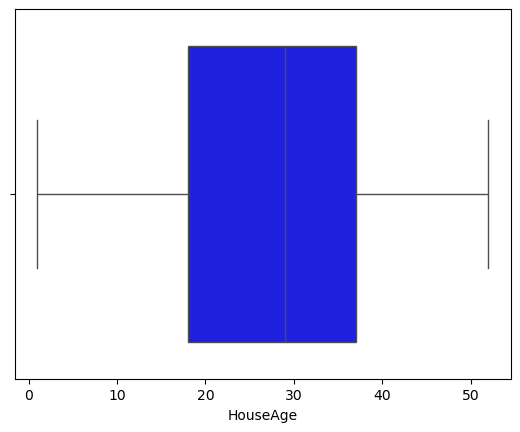

In [30]:
sns.boxplot(x = df['HouseAge'], color='Blue')

In [31]:
q1 = df.Population.quantile(0.18)
q2 = df.Population.quantile(0.38)
iqr = q2-q1
q1,q2,iqr

(26.019223662515376, 31.272991542223778, 5.253767879708402)

In [32]:
upper_limit = q2+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
upper_limit,lower_limit

(39.15364336178638, 18.13857184295277)

In [33]:
df.loc[(df['HouseAge']>upper_limit)|(df['HouseAge']<lower_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,17.944358,2.555556,37.88,-122.23
2,7.2574,52.0,8.288136,1.073446,22.271057,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,23.622024,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,23.769729,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,20.322401,2.139896,37.85,-122.25
...,...,...,...,...,...,...,...,...
20632,3.1250,15.0,6.023377,1.080519,32.357379,2.719481,39.26,-121.45
20636,2.5568,18.0,6.114035,1.315789,18.867962,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,31.733263,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,27.221315,2.123209,39.43,-121.32


In [34]:
new_df = df.loc[(df['HouseAge']<upper_limit)&(df['HouseAge']>lower_limit)]

<Axes: xlabel='HouseAge'>

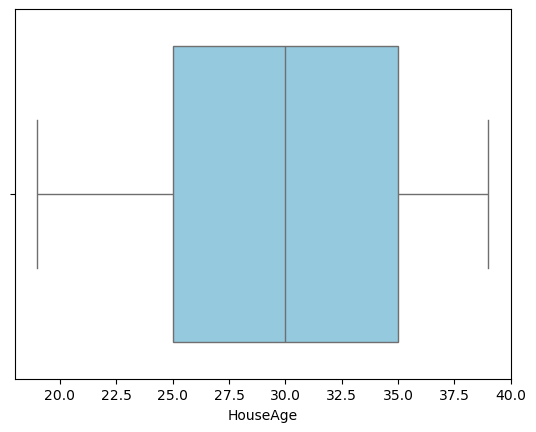

In [35]:
sns.boxplot(x=new_df.HouseAge, color = 'skyblue')

In [36]:
df[['MedInc','AveRooms','AveBedrms','AveOccup']]=ns.sqrt(df[['MedInc','AveRooms','AveBedrms','AveOccup']])

In [37]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.885342,41.0,2.642750,1.011835,17.944358,1.598611,37.88,-122.23
1,2.881215,21.0,2.497626,0.985840,49.000000,1.452529,37.86,-122.22
2,2.693956,52.0,2.878912,1.036073,22.271057,1.673995,37.85,-122.24
3,2.375521,52.0,2.411919,1.035886,23.622024,1.596228,37.85,-122.25
4,1.961173,52.0,2.506363,1.039750,23.769729,1.476979,37.85,-122.25


<Axes: xlabel='MedInc'>

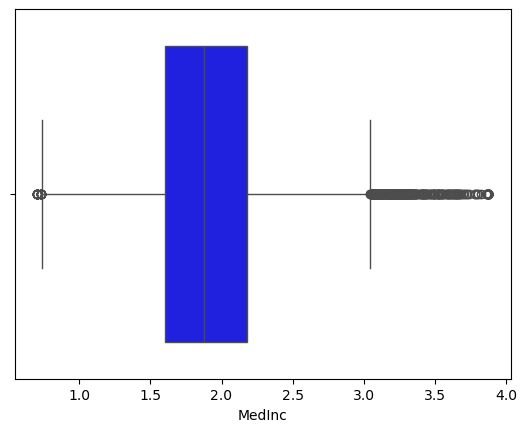

In [38]:
sns.boxplot(x = df['MedInc'], color='Blue')

In [39]:
q1 = df.MedInc.quantile(0.16)
q2 = df.MedInc.quantile(0.22)
iqr = q2-q1
q1,q2,iqr

(1.4786899606717603, 1.562897306614967, 0.08420734594320667)

In [40]:
upper_limit = q2+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
upper_limit,lower_limit

(1.689208325529777, 1.3523789417569503)

In [41]:
new_df = df.loc[(df['MedInc']<upper_limit)&(df['MedInc']>lower_limit)]

<Axes: xlabel='MedInc'>

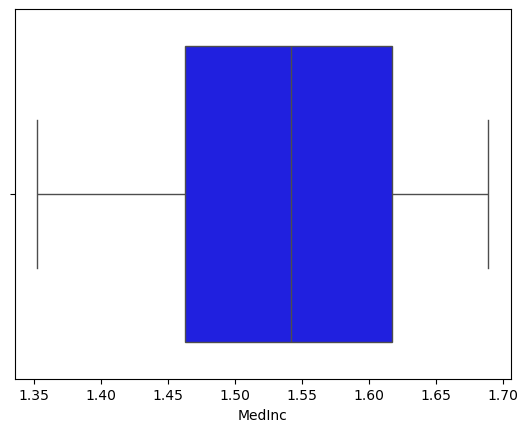

In [42]:
sns.boxplot(x = new_df.MedInc, color='Blue')

<Axes: xlabel='AveRooms'>

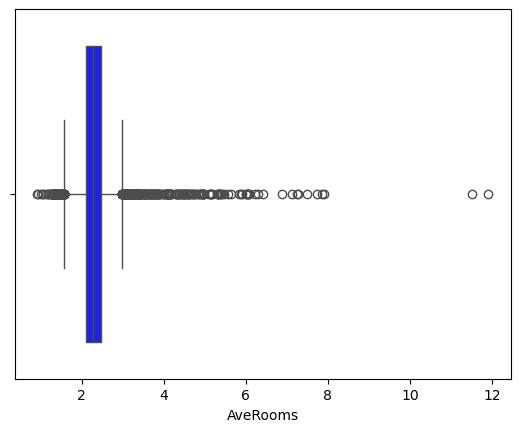

In [43]:
sns.boxplot(x = df['AveRooms'], color='Blue')

In [44]:
q1 = df.AveRooms.quantile(0.21)
q2 = df.AveRooms.quantile(0.25)
iqr = q2-q1
q1,q2,iqr

(2.074436325714766, 2.107300698932592, 0.03286437321782598)

In [45]:
upper_limit = q2+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
upper_limit,lower_limit

(2.156597258759331, 2.025139765888027)

In [46]:
new_df = df.loc[(df['AveRooms']<upper_limit)&(df['AveRooms']>lower_limit)]

<Axes: xlabel='AveRooms'>

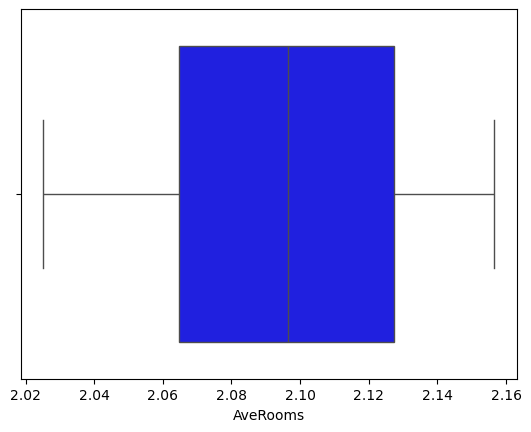

In [47]:
sns.boxplot(x = new_df.AveRooms, color='Blue')

<Axes: xlabel='AveBedrms'>

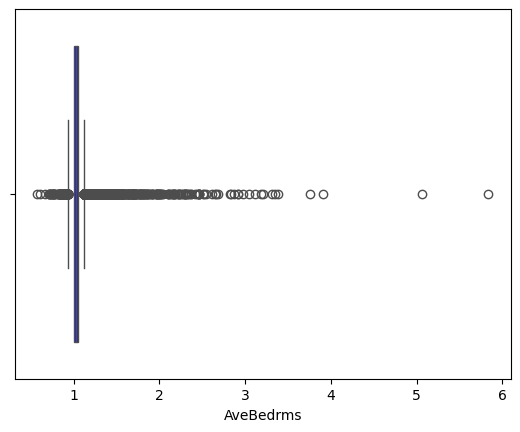

In [48]:
sns.boxplot(x = df['AveBedrms'], color='Blue')

In [49]:
df['AveBedrms']=ns.cbrt(df['AveBedrms'])


In [50]:
df['AveBedrms'].skew()

7.874866278825356

<Axes: xlabel='AveBedrms'>

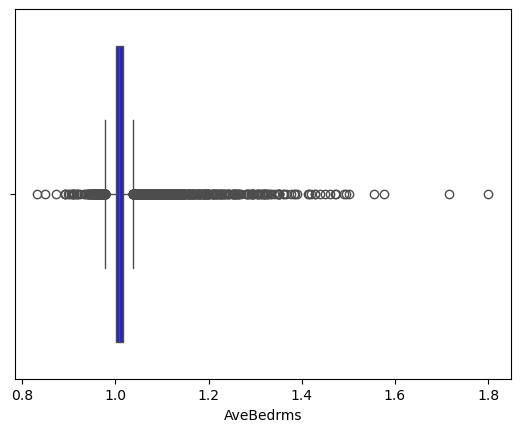

In [51]:
sns.boxplot(x = df['AveBedrms'], color='Blue')

In [52]:
q1 = df.AveBedrms.quantile(0.1)
q2 = df.AveBedrms.quantile(0.1002)
iqr = q2-q1
q1,q2,iqr

(0.9943224844561593, 0.9943362732272267, 1.3788771067391181e-05)

In [53]:
upper_limit = q2+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
upper_limit,lower_limit

(0.9943569563838278, 0.9943018012995583)

In [54]:
new_df = df.loc[(df['AveBedrms']<upper_limit)&(df['AveBedrms']>lower_limit)]

<Axes: xlabel='AveBedrms'>

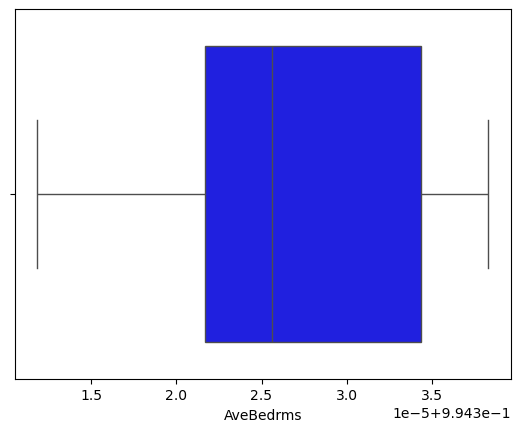

In [55]:
sns.boxplot(x = new_df.AveBedrms, color='Blue')

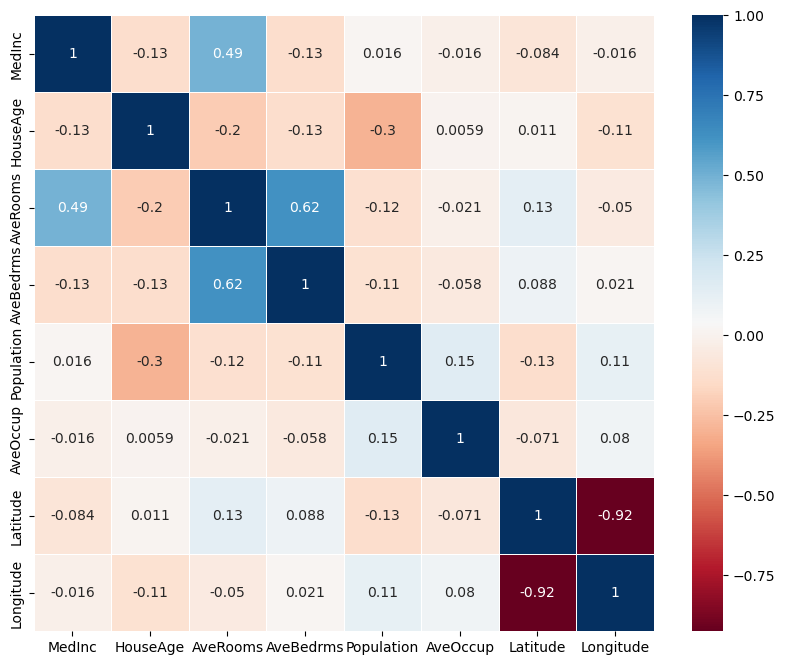

In [56]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = "RdBu",linewidths = 0.5)
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(new_df),columns = new_df.columns)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.093959,0.355626,0.433337,0.836026,-0.890233,0.631672,-0.546546,0.550851
1,-1.241044,-1.270092,-2.005056,0.093486,-0.513796,2.169970,0.611090,-1.057367
2,0.665868,0.423364,0.849687,-1.023488,0.803032,-0.010657,-0.596516,0.779208
3,1.608689,1.439438,1.161131,1.365381,-1.091607,-0.286937,-1.033752,1.080446
4,0.781353,0.829794,0.816417,1.121170,-0.150073,-0.638203,-1.033752,1.070728
5,-0.396816,0.355626,-0.120871,-0.402477,-0.826555,-0.573678,1.339818,-1.572386
6,-1.624526,-0.389495,-1.012812,-0.294595,1.982273,0.140847,1.689607,-1.067084
7,0.112518,-1.744260,-0.121833,-1.695503,0.686958,-1.433014,-0.429949,0.215603


In [63]:
from sklearn.preprocessing import LabelEncoder

In [65]:
LE= LabelEncoder()
new_df['MedInc'] = LE.fit_transform(new_df['MedInc'] )

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_828\3552786587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['MedInc'] = LE.fit_transform(new_df['MedInc'] )


In [67]:
new_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8470,3,36.0,2.317049,0.994334,25.000000,1.868588,33.91,-118.31
9749,1,12.0,1.853710,0.994327,27.694765,2.268844,36.69,-121.62
11028,5,37.0,2.396163,0.994318,37.121422,1.701458,33.79,-117.84
14359,7,52.0,2.455343,0.994338,23.558438,1.629571,32.74,-117.22
14367,6,43.0,2.389841,0.994336,30.298515,1.538174,32.74,-117.24


In [69]:
X = new_df[['HouseAge','AveRooms','AveBedrms]]
Y = new_df['MedInc']
X

,HouseAge,AveRooms,AveBedrms
8470,36.0,2.317049,0.994334
9749,12.0,1.853710,0.994327
11028,37.0,2.396163,0.994318
14359,52.0,2.455343,0.994338
14367,43.0,2.389841,0.994336
19195,36.0,2.211739,0.994323
19715,25.0,2.042254,0.994324
20347,5.0,2.211557,0.994312


In [71]:
X_scaled = scaler.fit_transform(X)

In [73]:

from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state=42)

In [77]:
X_train.shape

(6, 3)

In [79]:
Y_train.shape

(6,)

In [81]:
X_test.shape

(2, 3)

In [83]:
Y_test.shape

(2,)

In [85]:
from sklearn.linear_model import LinearRegression

In [179]:
model = LinearRegression()

In [181]:
model.fit(X_train,Y_train)


LinearRegression()

In [183]:
Y_pred = model.predict(X_test)
Y_pred

array([-2.87660144,  2.23426212])

In [185]:
results_df = pd.DataFrame({'Actual Values':Y_test,'Predicted_values':Y_pred})
print(results_df)

       Actual Values  Predicted_values
9749               1         -2.876601
19195              2          2.234262


In [187]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
r2,mse,mae

(-29.16583496044474, 7.541458740111185, 2.055431778886696)

In [95]:
from sklearn.tree import DecisionTreeClassifier


In [189]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [99]:
X_test.shape

(2, 3)

In [219]:
P=model.predict(X_test)

P

array([1.10672495e-04, 3.54151080e+00])

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,P)

0.0

In [193]:
model1=DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [195]:
P1 = model1.predict(X_test)
P1

array([4, 3], dtype=int64)

In [197]:
accuracy_score(Y_test,P1)


0.0

In [199]:
mae = mean_absolute_error(Y_test,P1)
mse = mean_squared_error(Y_test,P1)
r2 = r2_score(Y_test,P1)
r2,mse,mae

(-19.0, 5.0, 2.0)

In [129]:
from sklearn.ensemble import GradientBoostingRegressor


In [201]:
model = GradientBoostingRegressor()
model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [203]:
P2 = model.predict(X_test)
P2

array([1.10672495e-04, 3.54151080e+00])

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [205]:
mse = mean_squared_error(Y_test,P2)
mse

1.6880171047159271

In [207]:
mae = mean_absolute_error(Y_test,P2)
mae

1.270700063048064

In [209]:
r2 = r2_score(Y_test,P2)
r2

-5.752068418863709

In [151]:
from sklearn.svm import SVR


In [211]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [213]:
svr = SVR(kernel = 'rbf',C= 90,epsilon = 0.1)
svr.fit(X_train_scaled,Y_train)

SVR(C=90)

In [215]:
Y_pred = svr.predict(X_test_scaled)
Y_pred

array([0.99690579, 5.40749645])

In [217]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
r2,mse,mae

(-22.222083210042637, 5.805520802510659, 1.7052953274467022)